# Project: Write a data science blog post

## Business Understanding

Spotify is a music/audio streaming service with about 400 million monthly streamers. I am interested to understand the
public data from Spotify and what insights I can draw from them. The dataset is the 2023 most streamed artists and songs on 
Spotify, as well as features on other streaming services.
I have sought to find answers to three main questions:
1. How did artists fare across various platforms in the year?
2. Which songs had the best performance across all platforms?
3. How have audio features of songs varied over the years?

## Data Understanding

### Import libraries and access data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os
import csv
import seaborn as sns

### Gather data

In [2]:

def load_data(file_path):
    '''
    returns the spotify datafram for the csv file sound at file_path

    input: a path to the csv
    output: processed pandas dataframe of input csv file for music data analysis
    '''
    df = pd.read_csv(file_path, encoding='latin1')
    return df

df = load_data("spotify_2023.csv")


### Explore data

In [3]:
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [4]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

By looking at the information on the data, some features contain null values and are of object and integer data types. 
The release year, month and day are integers and need to be date format. I will also treat missing values and mistyped values

### Clean and prepare data

Here is my strategy for cleaning and preparing the data for my analysis:
1. The columns in_deezer_playlist and in_shazam_charts though they are numeric have some values separated by comma. eg. 3,400. I will remove that.
2. Some columns are meant to be numeric but are object datatypes in the data so I will convert them into integers
3. I will create a release date column
4. 3 columns contain null value and will be handled using the median imputation for streams to reduce sensitivity and mode for the shazam charts and the key

In [6]:
# This seems specific but is due to an error that was identified when changing the dtypes below
df.in_deezer_playlists = df['in_deezer_playlists'].str.replace(',','')
df.in_shazam_charts = df['in_shazam_charts'].str.replace(',','')

# Converting datatypes from object to integer
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'])
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'])

# Create release_date column from release year, month and day
df['released_date'] = pd.to_datetime(dict(year=df.released_year, month=df.released_month, day=df.released_day))


# handling missing values by filling in values appropriate to each feature. 
streams_median = df['streams'].median() # used median imputation since there are extreme values and want to reduce sensitivity
df['streams'].fillna(streams_median, inplace=True)

shazam_val = df['in_shazam_charts'].mode()[0] #Mode imputation is appropriate for values of rank or position
df['in_shazam_charts'].fillna(shazam_val, inplace=True)

key_val = df['key'].mode()[0] #mode imputation since less than 5% of the values are missing and are categorical
df['key'].fillna(key_val, inplace=True)

# Drop the released_year, month and day columns since release_date column has been created
df = df.drop(columns=['released_year','released_month','released_day'])

/var/folders/yv/5ykk6jzj43qb0f6x8fgvxyg40000gn/T/ipykernel_51561/3372773566.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['streams'].fillna(streams_median, inplace=True)
/var/folders/yv/5ykk6jzj43qb0f6x8fgvxyg40000gn/T/ipykernel_51561/3372773566.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               953 non-null    float64       
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   953 non-null    int64         
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      953 non-null    float64       
 11  bpm                   953 non-null    int64         
 12  key                   953 non-null    object        
 13  mode                

All the necessary cleaning and preparation of data have been done and ready for analysis and evaluation

## Evaluation

### Question 1: How do artists fare across various streaming platforms?

In [9]:
artists_count = df['artist(s)_name'].value_counts() 

/var/folders/yv/5ykk6jzj43qb0f6x8fgvxyg40000gn/T/ipykernel_51561/4198857110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artists_count.head(10).index, y=artists_count.head(10), palette='viridis')


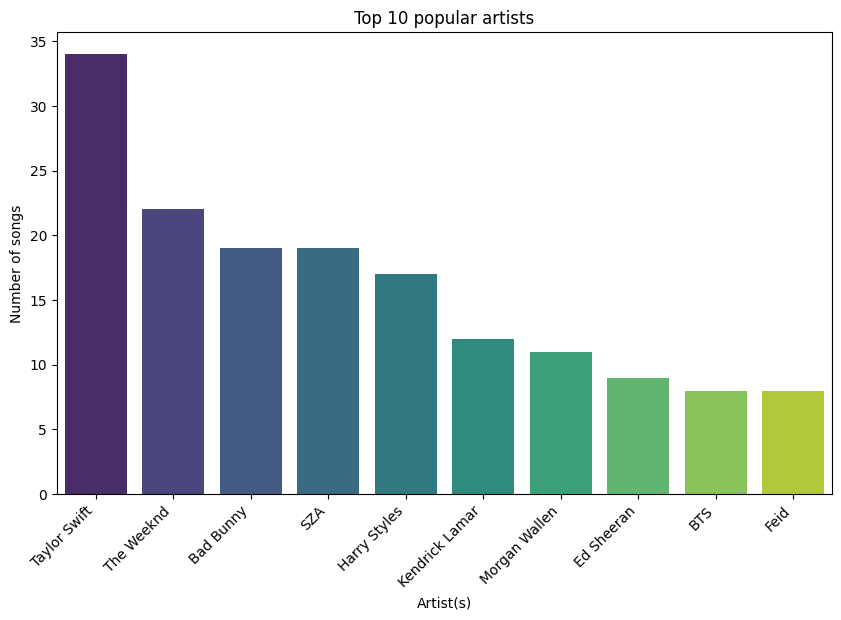

In [10]:
# Visualising the top 10 most popular artists

plt.figure(figsize=(10,6))
sns.barplot(x=artists_count.head(10).index, y=artists_count.head(10), palette='viridis')
plt.title('Top 10 popular artists')
plt.xlabel('Artist(s)')
plt.ylabel('Number of songs')
plt.xticks(rotation=45, ha='right') 

plt.show()


We can see that Taylor Swift is the most popular artist. She has about 34 of her songs played across the year 2023. But does that really mean she is popular. One way to find out is by looking at the total number of songs streamed

In [11]:
# Find artists with most streamed songs in 2023
artist_streams = df.groupby('artist(s)_name')['streams'].sum() #group by artist name and add the streams for each artist
artist_streams_sorted = artist_streams.sort_values(ascending=False) #sort artists in descending order of total number of streams

/var/folders/yv/5ykk6jzj43qb0f6x8fgvxyg40000gn/T/ipykernel_51561/4092480330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_streams_sorted.head(10).index, y=artist_streams_sorted.head(10), palette='viridis')


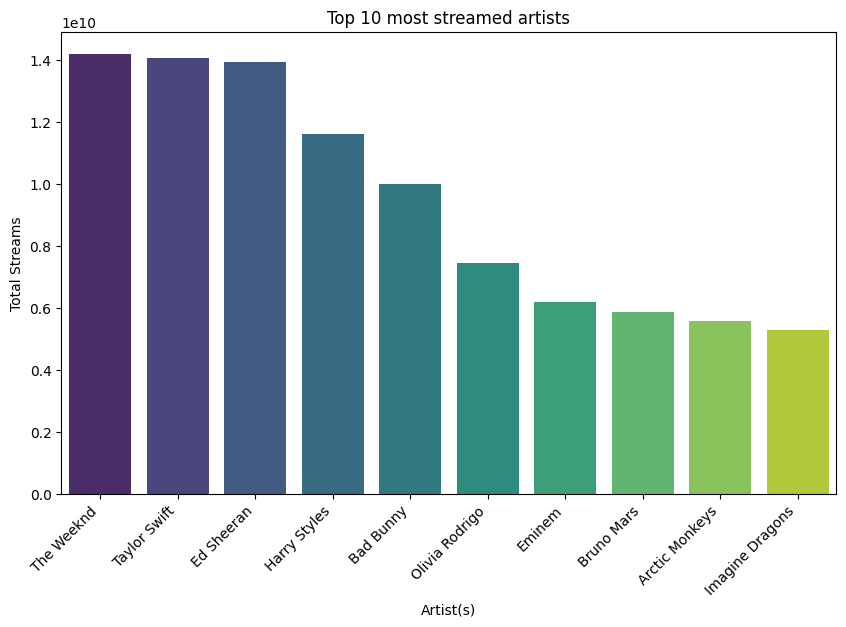

In [12]:

#Plot top 10 artists and their total number of streams
plt.figure(figsize=(10,6))
sns.barplot(x=artist_streams_sorted.head(10).index, y=artist_streams_sorted.head(10), palette='viridis')
plt.title('Top 10 most streamed artists')
plt.xlabel('Artist(s)')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right') 

plt.show()

The viz above shows the top 10 most streamed artists in 2023. We can see that The Weeknd had the most streamed, followed by Taylor Swift and Ed Sheeran. It's interesting that Ed Sheeran isn't in the top 3 of most number of songs in the earlier visualisation but his smaller number of songs were played well enough to be in the top 3 most streamed! 

One more thing to see how artists performed is to see their presence in playlists and charts. This gives an indication of how popular they are. 

In [13]:
# Create a function to group artists popularity in different streaming platforms
def calculate_artist_metrics(df):
    """
    Calculate various metrics for artists including the number of playlists and mean ranks for Spotify, Apple, Deezer, and Shazam.

    Args:
    - df (pandas.DataFrame): DataFrame containing artist metrics data.

    Returns:
    - artist_metrics (dict): Dictionary containing calculated metrics for each platform.
    """
    artist_metrics = {}

    # Spotify metrics
    artist_metrics['spotify_playlists'] = df.groupby('artist(s)_name')['in_spotify_playlists'].sum()
    artist_metrics['spotify_charts'] = round(df.groupby('artist(s)_name')['in_spotify_charts'].mean())

    # Apple metrics
    artist_metrics['apple_playlists'] = df.groupby('artist(s)_name')['in_apple_playlists'].sum()
    artist_metrics['apple_charts'] = round(df.groupby('artist(s)_name')['in_apple_charts'].mean())

    # Deezer metrics
    artist_metrics['deezer_playlists'] = df.groupby('artist(s)_name')['in_deezer_playlists'].sum()
    artist_metrics['deezer_charts'] = round(df.groupby('artist(s)_name')['in_deezer_charts'].mean())

    # Shazam metrics
    artist_metrics['shazam_charts'] = round(df.groupby('artist(s)_name')['in_shazam_charts'].mean())

    return artist_metrics

artist_metrics = calculate_artist_metrics(df)

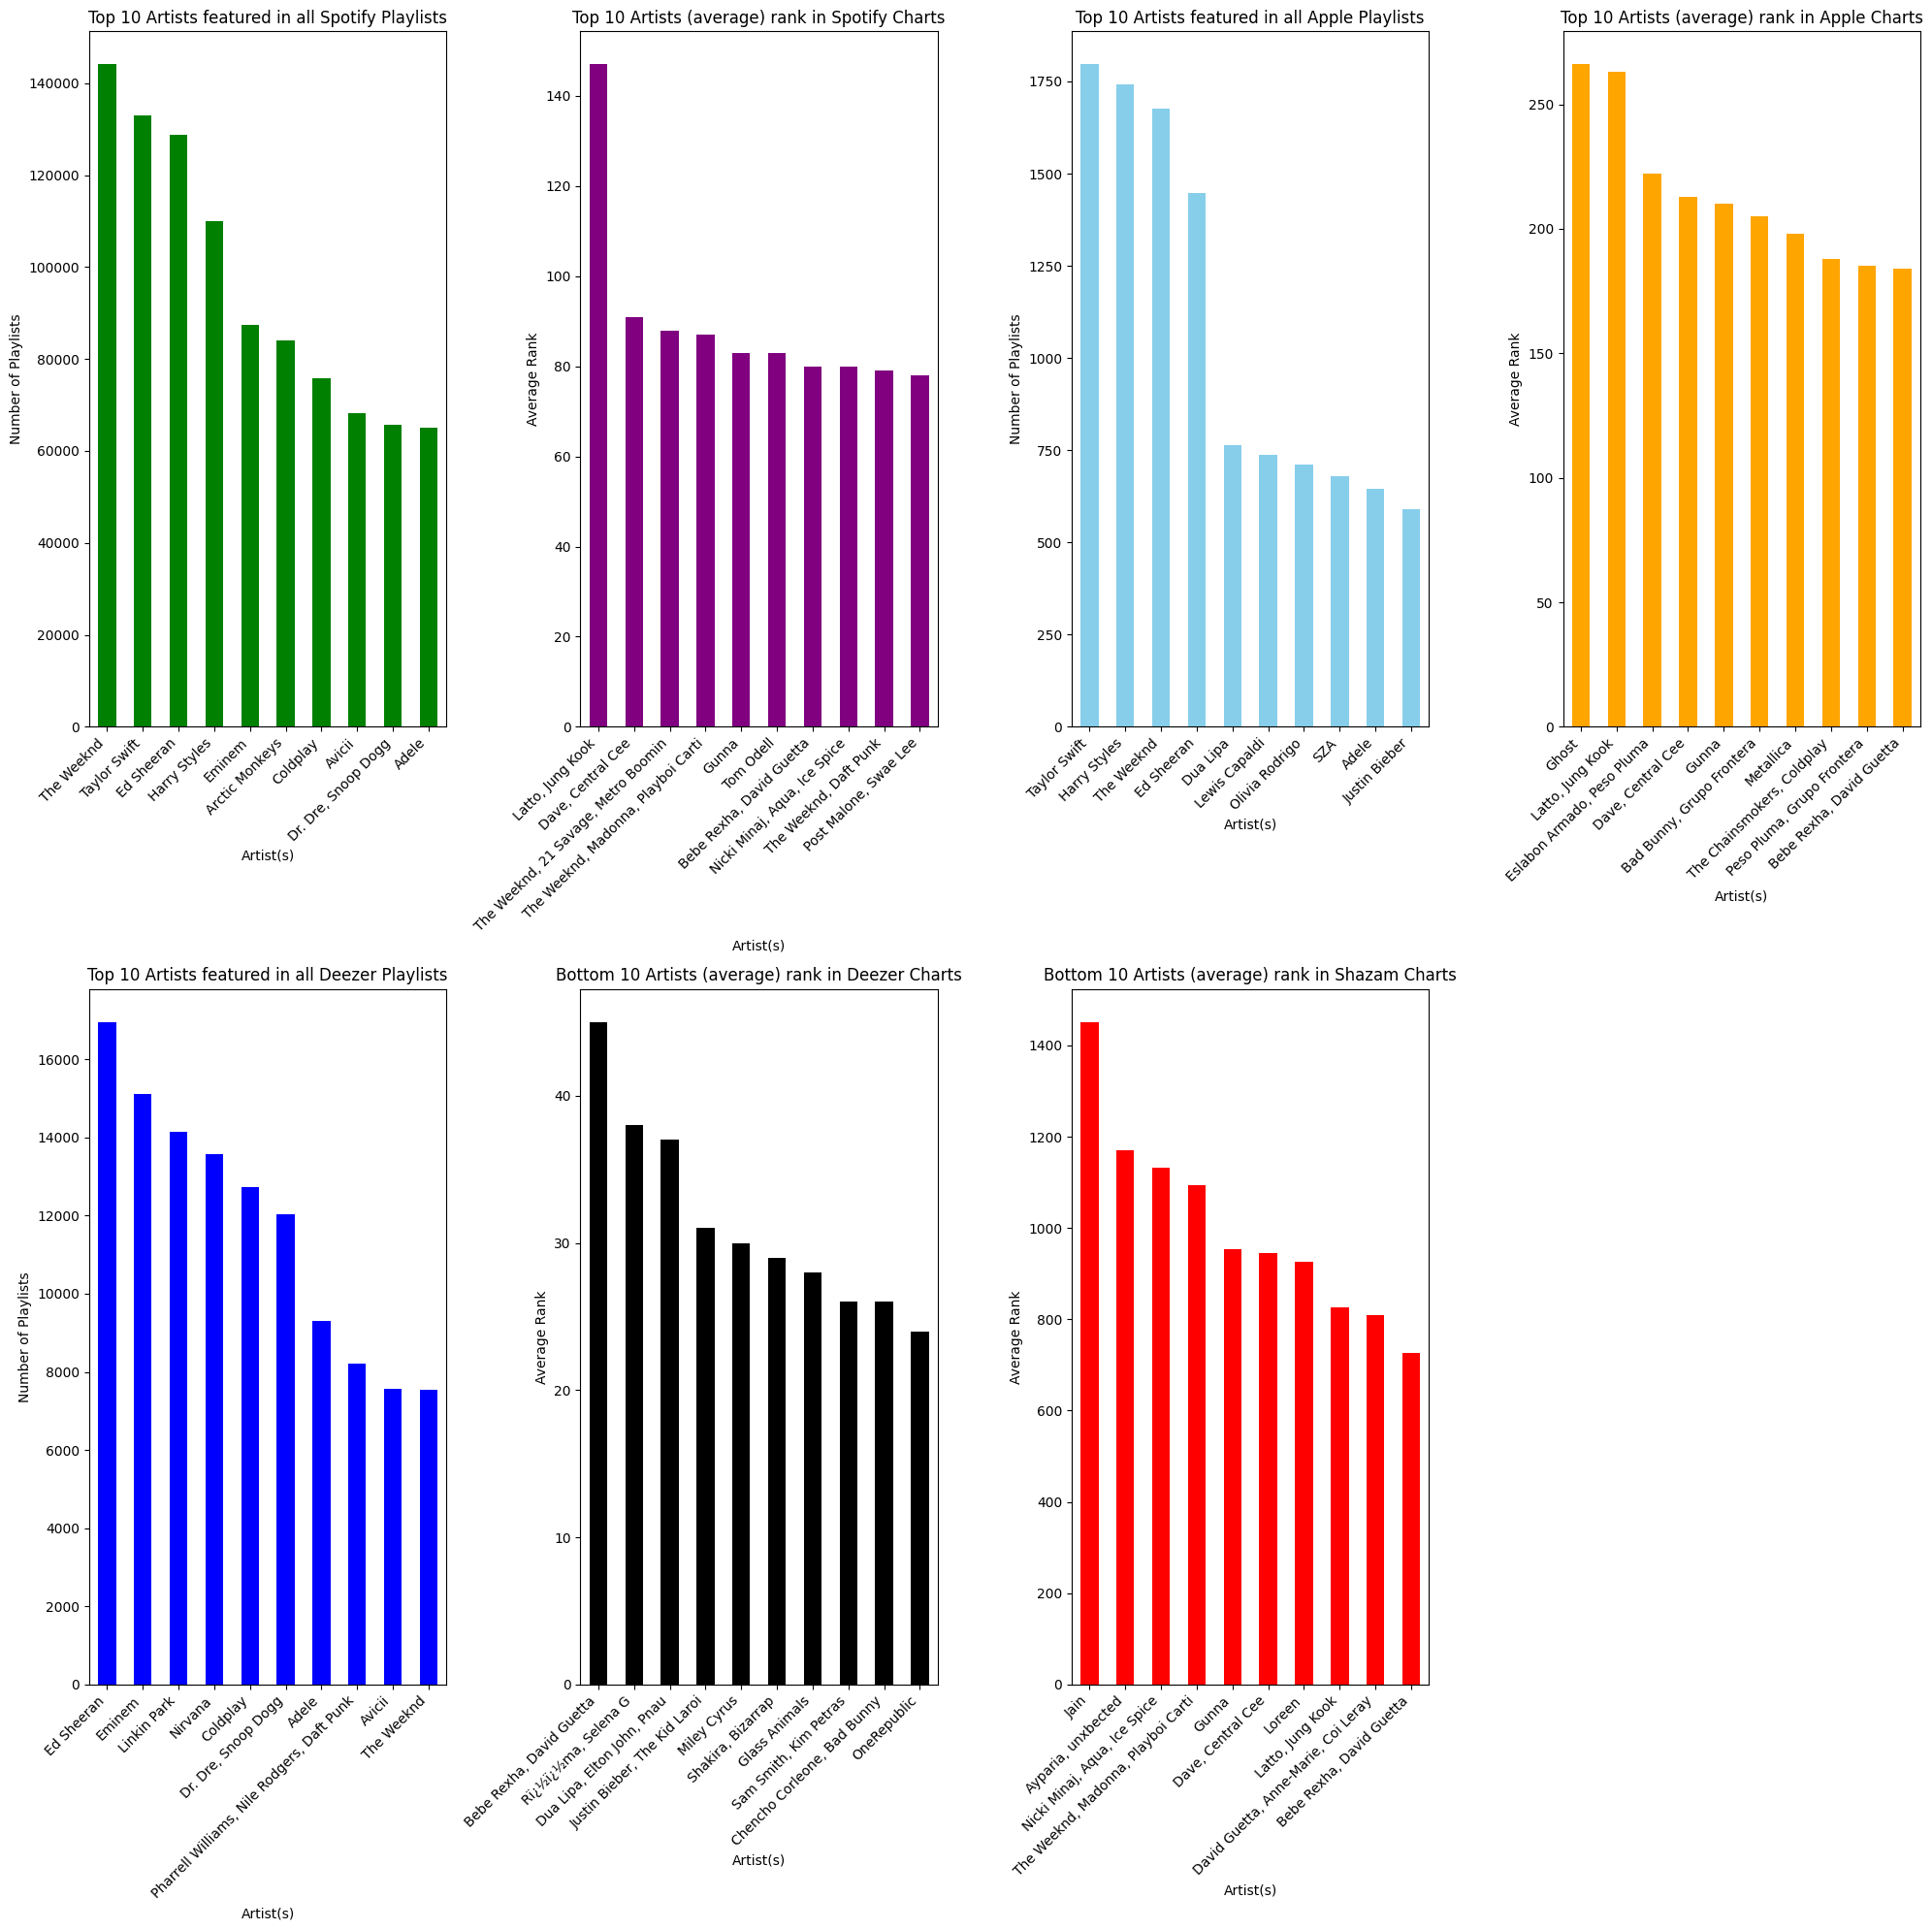

In [14]:
# Visualise these metrics
def visualise_artist_metrics(artist_metrics):
    """
    Visualize various metrics for artists using the given artist_metrics dictionary.

    Args:
    - artist_metrics (dict): Dictionary containing metrics for artists.
    """
    plt.figure(figsize=(20,20))

    plt.subplot(2,4,1)
    artist_metrics['spotify_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='green')
    plt.title('Top 10 Artists featured in all Spotify Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,2)
    artist_metrics['spotify_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
    plt.title('Top 10 Artists (average) rank in Spotify Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,3)
    artist_metrics['apple_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Artists featured in all Apple Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,4)
    artist_metrics['apple_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
    plt.title('Top 10 Artists (average) rank in Apple Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,5)
    artist_metrics['deezer_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
    plt.title('Top 10 Artists featured in all Deezer Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,6)
    artist_metrics['deezer_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='black')
    plt.title('Bottom 10 Artists (average) rank in Deezer Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,7)
    artist_metrics['shazam_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='red')
    plt.title('Bottom 10 Artists (average) rank in Shazam Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


visualise_artist_metrics(artist_metrics)

In [15]:
# for the top ten streamed artists what was their most streamed song(s) in 2023?

top_ten_artists = artist_streams_sorted.head(10)

#a new dataframe for the most streamed song for each artist
most_streamed_songs = df.loc[df['artist(s)_name'].isin(top_ten_artists.index)].\
groupby('artist(s)_name')['track_name'].agg(lambda x:x.value_counts().index[0])

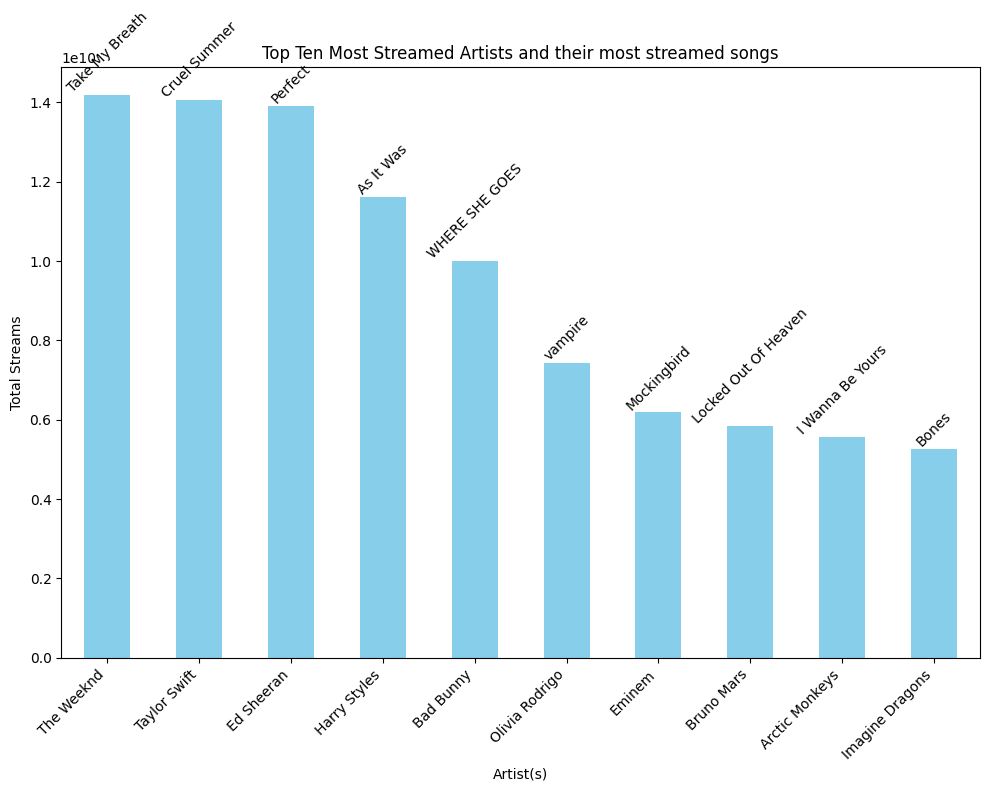

In [16]:
# plot the total streams for each artist
plt.figure(figsize=(10,8))
ax = top_ten_artists.plot(kind='bar', color='skyblue')
ax.set_ylabel('Total Streams')

#Annotate the plot with the most streamed songs for the artist
for i,artist in enumerate(top_ten_artists.index):
    plt.text(i, top_ten_artists[artist], most_streamed_songs[artist], ha='center', va='bottom', rotation=45)

plt.title('Top Ten Most Streamed Artists and their most streamed songs')
plt.xlabel('Artist(s)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I wanted to see what was the most streamed song by the top 10 most streamed artist. The chart above is a repetition of the 2nd previous visualistion but includes the song that stood out for their many streams

## Question 2: What is the performance of songs?

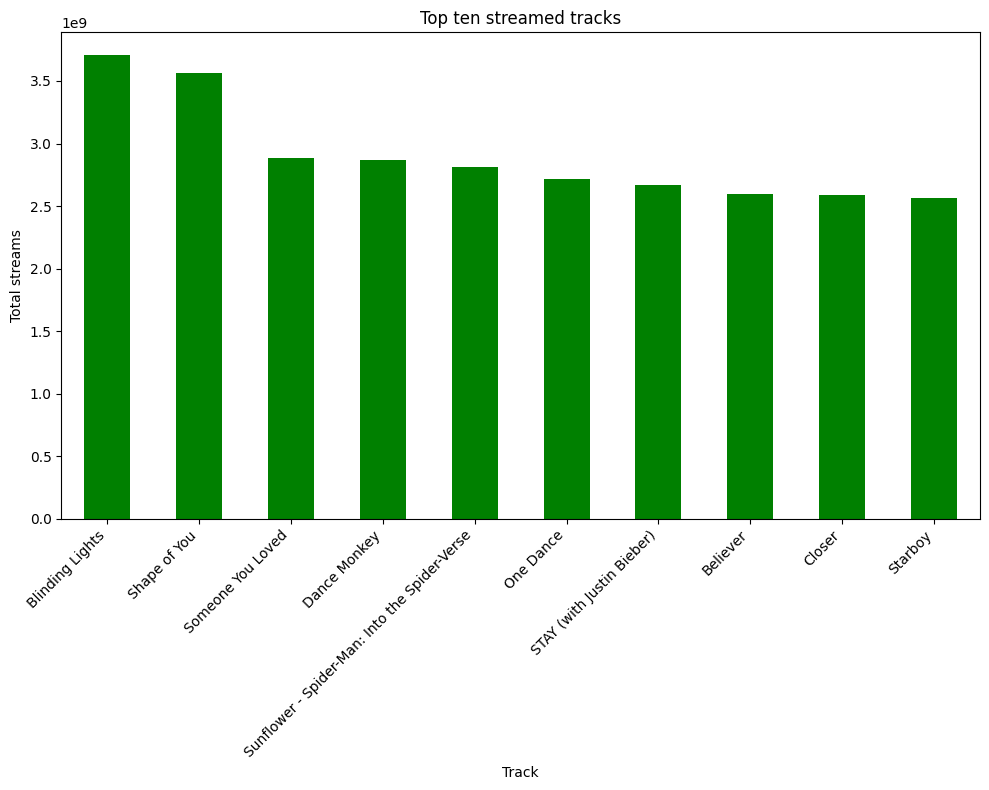

In [17]:
#find the most streamed songs

top_ten_tracks = df.groupby('track_name')['streams'].sum().sort_values(ascending=False).head(10)

#VISUALISE THEM
plt.figure(figsize=(10,8))
top_ten_tracks.plot(kind='bar', color='green')
plt.title('Top ten streamed tracks')
plt.xlabel('Track')
plt.ylabel('Total streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# A function to calculate the song metrics
def calculate_track_metrics(df):
    """
    Calculate various metrics for tracks including the number of playlists and mean ranks for Spotify, Apple, Deezer, and Shazam.

    Args:
    - df (pandas.DataFrame): DataFrame containing artist metrics data.

    Returns:
    - track_metrics (dict): Dictionary containing calculated metrics for each platform.
    """
    track_metrics = {}
    
    #Spotify metric
    track_metrics['spotify_playlists'] = df.groupby('track_name')['in_spotify_playlists'].sum()
    track_metrics['spotify_charts'] = round(df.groupby('track_name')['in_spotify_charts'].mean()) # Mean rank in Spotify charts

    # Apple metric
    track_metrics['apple_playlists'] = df.groupby('track_name')['in_apple_playlists'].sum()
    track_metrics['apple_charts'] = round(df.groupby('track_name')['in_apple_charts'].mean())  # Mean rank in Apple charts

    #Deezer metric
    track_metrics['deezer_playlists'] = df.groupby('track_name')['in_deezer_playlists'].sum()
    track_metrics['deezer_charts'] = round(df.groupby('track_name')['in_deezer_charts'].mean())  # Mean rank in Deezer charts

    # Shazam metric
    track_metrics['shazam_charts'] = round(df.groupby('track_name')['in_shazam_charts'].mean())  

    return track_metrics

track_metrics = calculate_track_metrics(df)

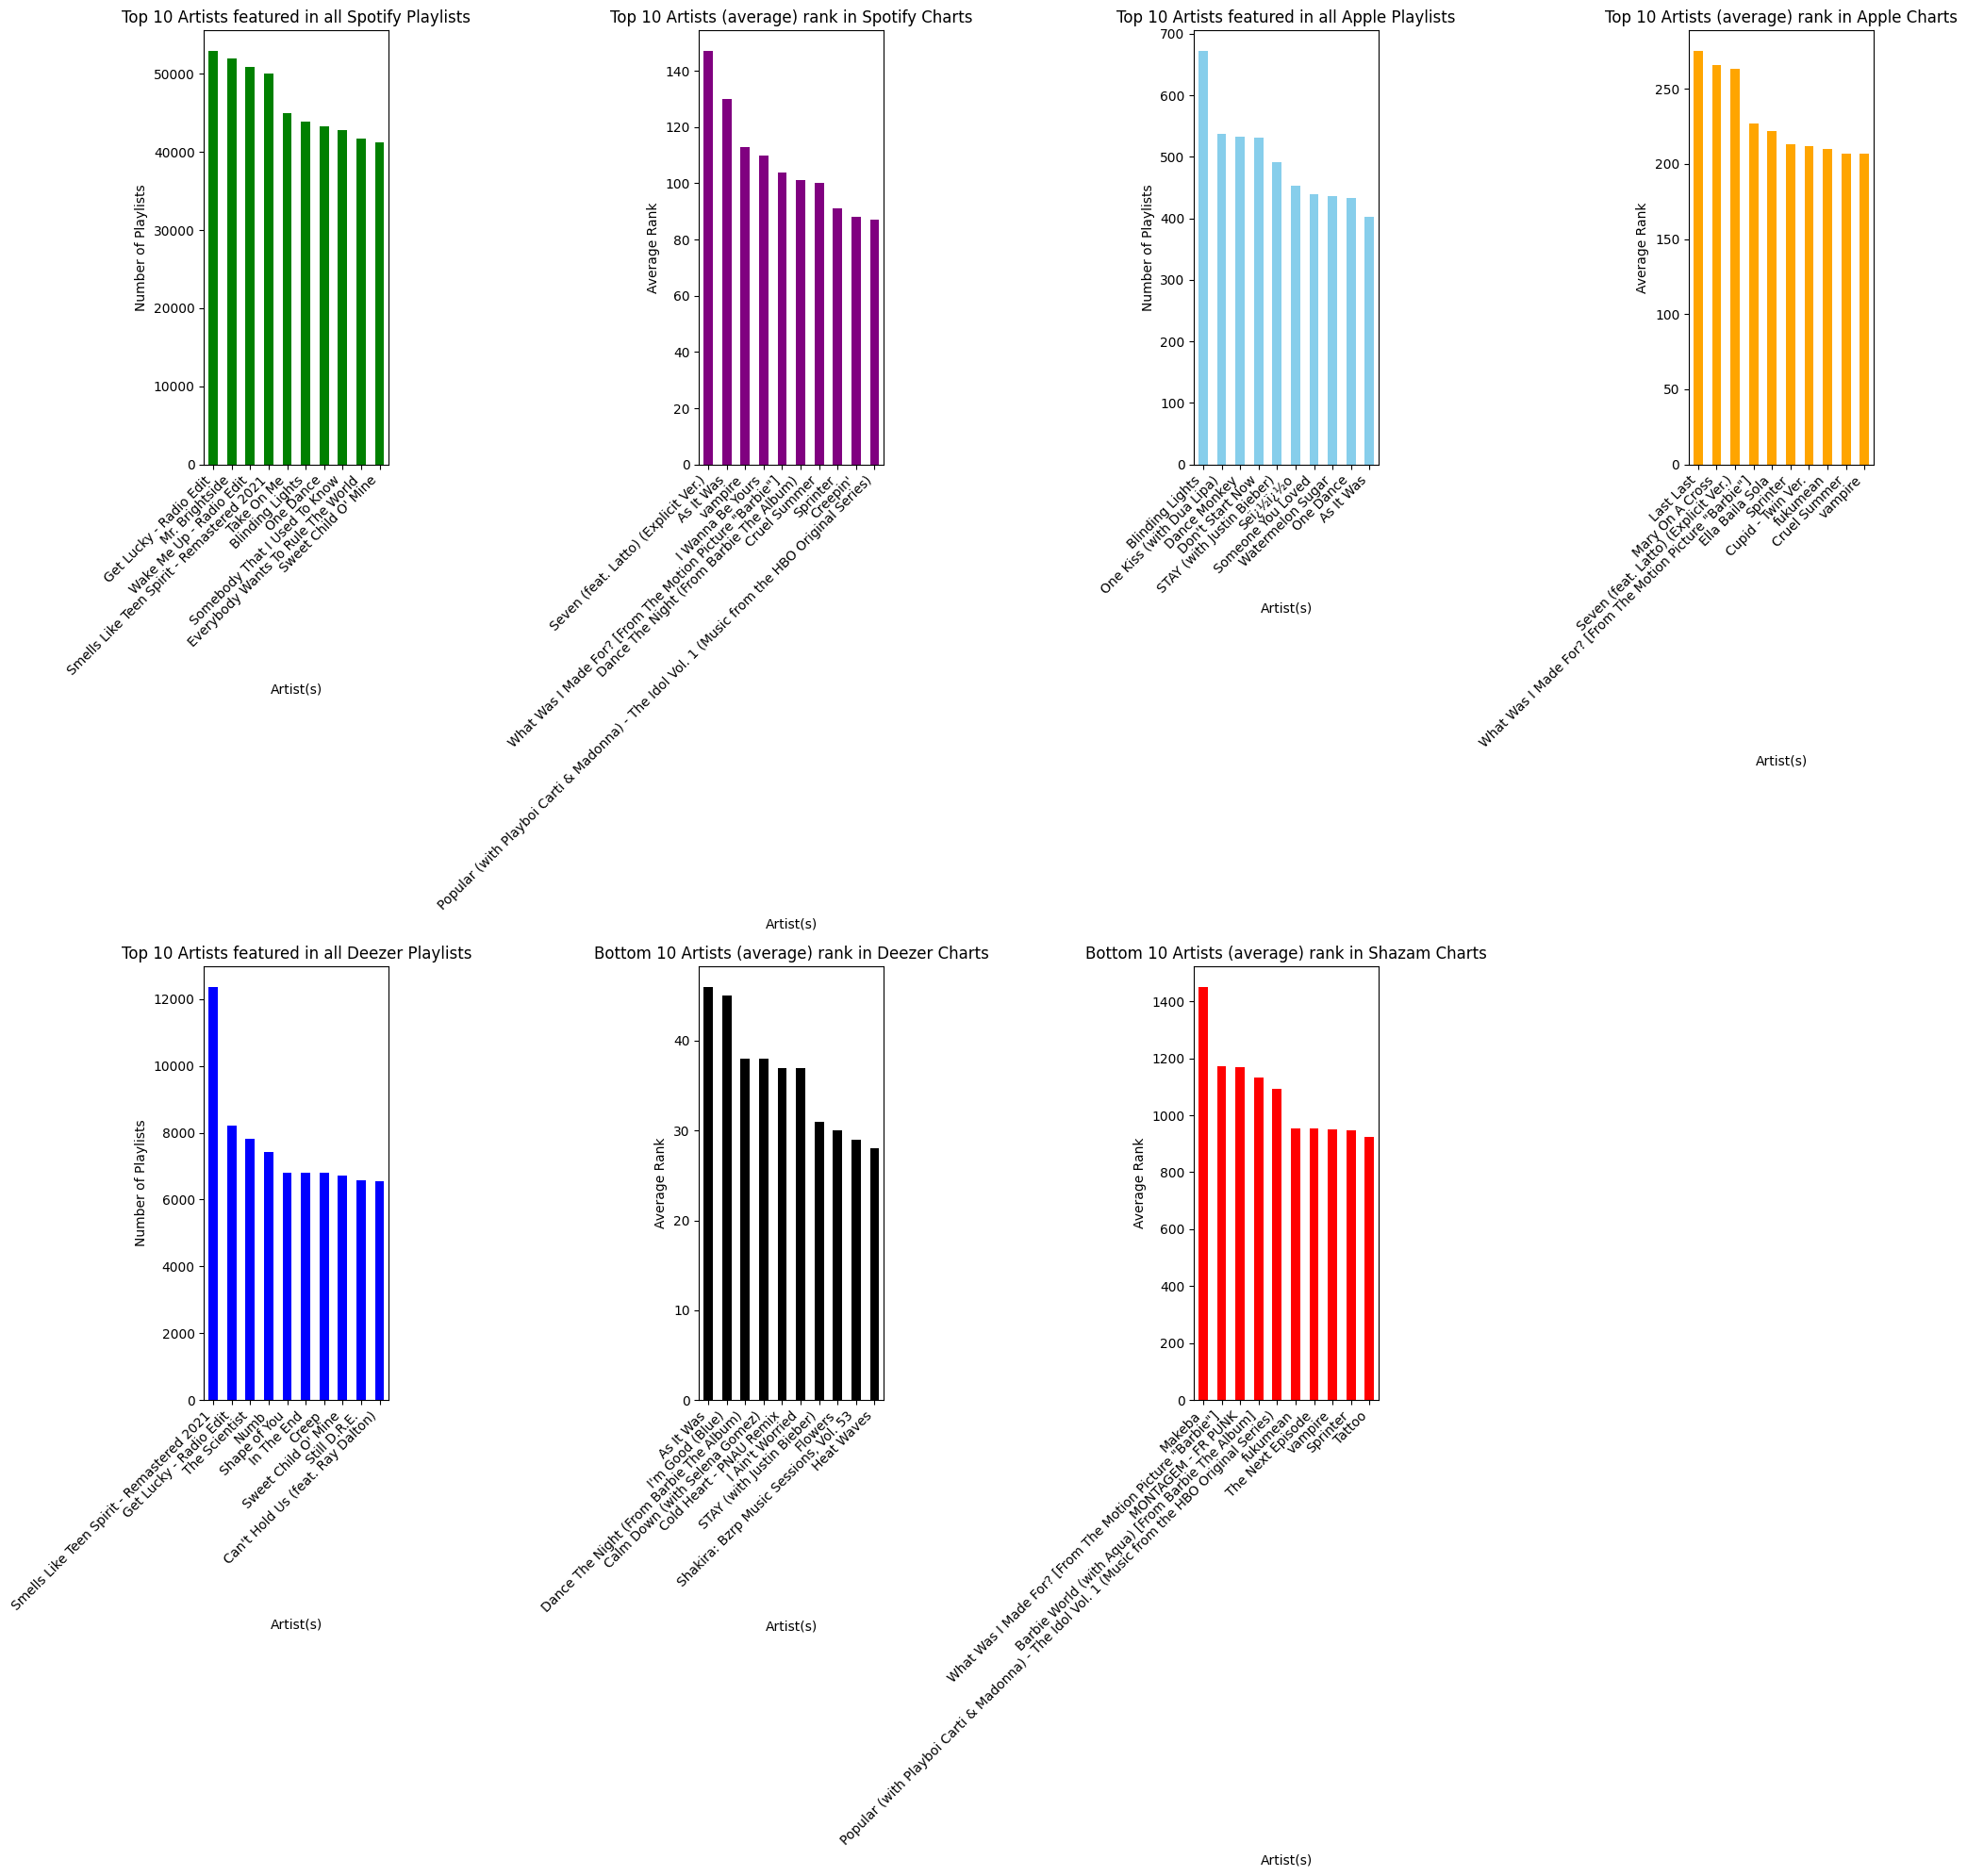

In [21]:
def visualise_track_metrics(track_metrics):
    """
    Visualize various metrics for artists using the given artist_metrics dictionary.

    Args:
    - artist_metrics (dict): Dictionary containing metrics for artists.
    """
    plt.figure(figsize=(20,20))

    plt.subplot(2,4,1)
    track_metrics['spotify_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='green')
    plt.title('Top 10 Artists featured in all Spotify Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,2)
    track_metrics['spotify_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
    plt.title('Top 10 Artists (average) rank in Spotify Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,3)
    track_metrics['apple_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Artists featured in all Apple Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,4)
    track_metrics['apple_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
    plt.title('Top 10 Artists (average) rank in Apple Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,5)
    track_metrics['deezer_playlists'].sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
    plt.title('Top 10 Artists featured in all Deezer Playlists')
    plt.xlabel('Artist(s)')
    plt.ylabel('Number of Playlists')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,6)
    track_metrics['deezer_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='black')
    plt.title('Bottom 10 Artists (average) rank in Deezer Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(2,4,7)
    track_metrics['shazam_charts'].sort_values(ascending=False).head(10).plot(kind='bar', color='red')
    plt.title('Bottom 10 Artists (average) rank in Shazam Charts')
    plt.xlabel('Artist(s)')
    plt.ylabel('Average Rank')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

visualise_track_metrics(track_metrics)

For the visualisation above, we can see the number of playlists and charts each song has appeared in across the different platforms. The track "Blinding Lights" by The Weeknd appears most in the top ranks. 

### Question 3: How are audio features varied for songs released in different years?

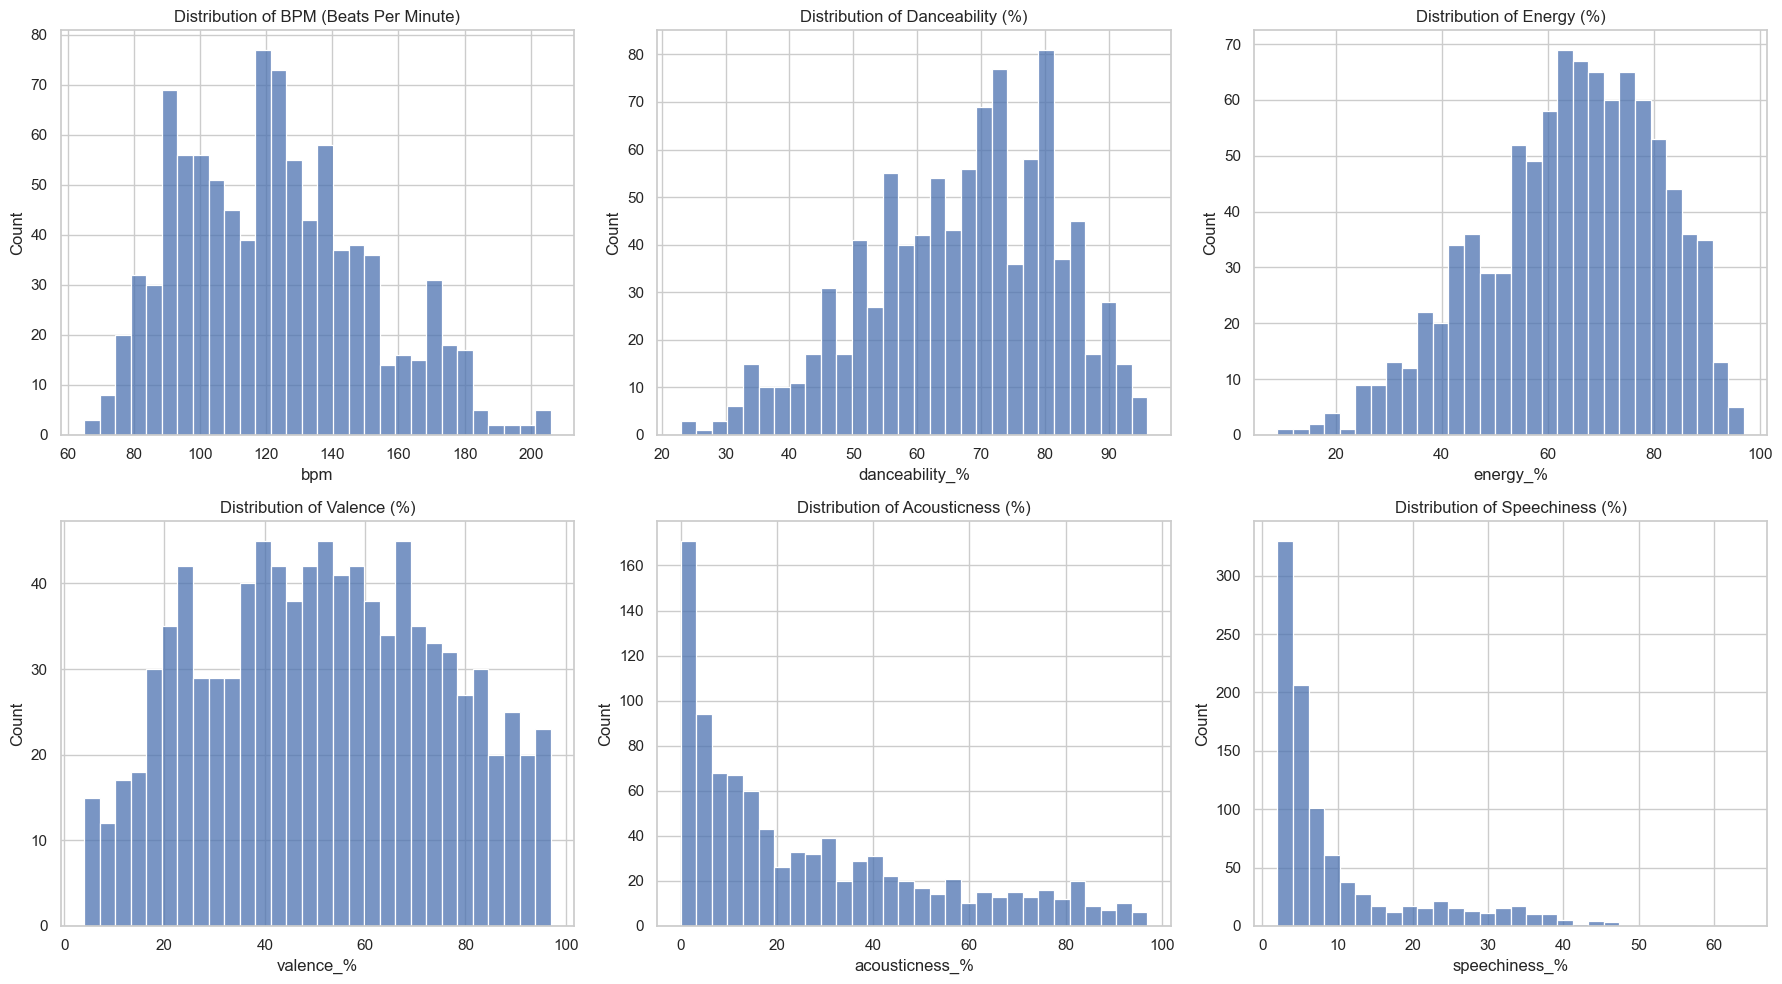

In [22]:
#Plot statistics of the audio features of the tracks
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(df['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(df['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Energy
sns.histplot(df['energy_%'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Energy (%)')

# Valence
sns.histplot(df['valence_%'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Valence (%)')

# Acousticness
sns.histplot(df['acousticness_%'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Speechiness
sns.histplot(df['speechiness_%'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()


The histogram plots above describe the distribution of teh audio features for all songs in the dataset. 
The danceability and energy features follow a near normal distribution whilst the acousticness and speechiness are right skewed. Nothing will be done in terms of transformation since I am not going to create a model.

I will be analysing how the audio features have varied over time. Songs in the dataset have different release dates and it will be interesting to infer the characteristics of songs across different decades.

In [23]:
# Transform the audio features and normalise the values to be between 0 and 1 for readability and analysis
df[['danceability', 'valence', 'energy','acousticness', 'instrumentalness', 'liveness', 'speechiness']] =\
df[['danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]/100

In [24]:
# drop the old audio features
df.drop(columns=['danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1, inplace=True)

In [25]:
df[['danceability', 'valence', 'energy','acousticness', 'instrumentalness', 'liveness', 'speechiness']] #checking everything is right

danceability  valence  energy  acousticness  instrumentalness  liveness  \
0            0.80     0.89    0.83          0.31              0.00      0.08   
1            0.71     0.61    0.74          0.07              0.00      0.10   
2            0.51     0.32    0.53          0.17              0.00      0.31   
3            0.55     0.58    0.72          0.11              0.00      0.11   
4            0.65     0.23    0.80          0.14              0.63      0.11   
..            ...      ...     ...           ...               ...       ...   
948          0.60     0.24    0.39          0.57              0.00      0.08   
949          0.42     0.07    0.24          0.83              0.01      0.12   
950          0.80     0.81    0.67          0.04              0.00      0.08   
951          0.82     0.67    0.77          0.08              0.00      0.12   
952          0.61     0.32    0.67          0.15              0.00      0.11   

     speechiness  
0           0.04  
1           0.04  
2           0.06  
3           0.15  
4           0.06  
..           ...  
948         0.03  
949         0.06  
950         0.06  
951         0.05  
952         0.05  

[953 rows x 7 columns]

In [26]:
df[['bpm', 'danceability','valence', 'energy', 
    'acousticness', 'instrumentalness', 'liveness','speechiness']].describe() #exploring the audio features

bpm  danceability     valence      energy  acousticness  \
count  953.000000    953.000000  953.000000  953.000000    953.000000   
mean   122.540399      0.669696    0.514313    0.642791      0.270577   
std     28.057802      0.146306    0.234806    0.165505      0.259961   
min     65.000000      0.230000    0.040000    0.090000      0.000000   
25%    100.000000      0.570000    0.320000    0.530000      0.060000   
50%    121.000000      0.690000    0.510000    0.660000      0.180000   
75%    140.000000      0.780000    0.700000    0.770000      0.430000   
max    206.000000      0.960000    0.970000    0.970000      0.970000   

       instrumentalness    liveness  speechiness  
count        953.000000  953.000000   953.000000  
mean           0.015813    0.182130     0.101312  
std            0.084098    0.137112     0.099129  
min            0.000000    0.030000     0.020000  
25%            0.000000    0.100000     0.040000  
50%            0.000000    0.120000     0.060000  
75%            0.000000    0.240000     0.110000  
max            0.910000    0.970000     0.640000

In [27]:
#Extract month and year from the 'released_date' columns
# for the analysis I only need the release year hence extracting the year and month from the date column
df['released_month'] = df['released_date'].dt.month
df['released_year'] = df['released_date'].dt.year

In [28]:
# Group the average values of the audio features by the release year
audio_df = df[['released_year','bpm', 'danceability','valence', 'energy', 'acousticness', 'instrumentalness', 'liveness','speechiness']]
audio_features_by_year = audio_df.groupby('released_year').mean()

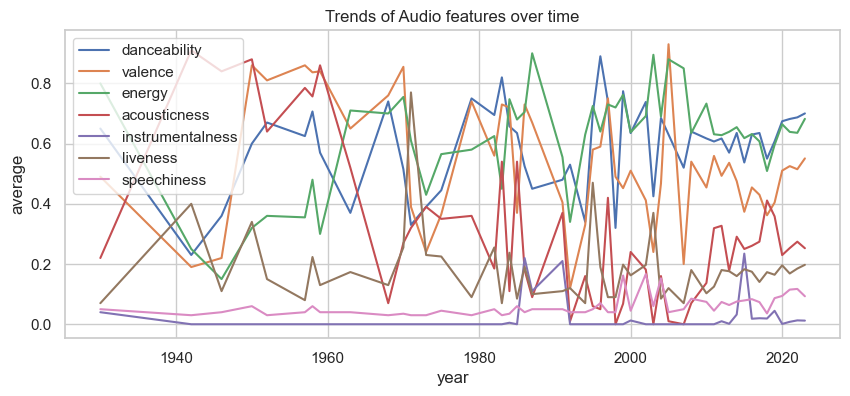

In [29]:
#Plot the trends of the audio features over time
plt.figure(figsize=(10,4))

for feature in ['danceability','valence', 'energy', 'acousticness', 'instrumentalness', 'liveness','speechiness']:
    plt.plot(audio_features_by_year.index, audio_features_by_year[feature], label=feature)

plt.xlabel('year')
plt.ylabel('average')
plt.title('Trends of Audio features over time')
plt.legend()
plt.grid(True)
plt.show()

It is difficult to explain what is going on here from the chart above. So I am going to take each audio feature apart for easy readablity

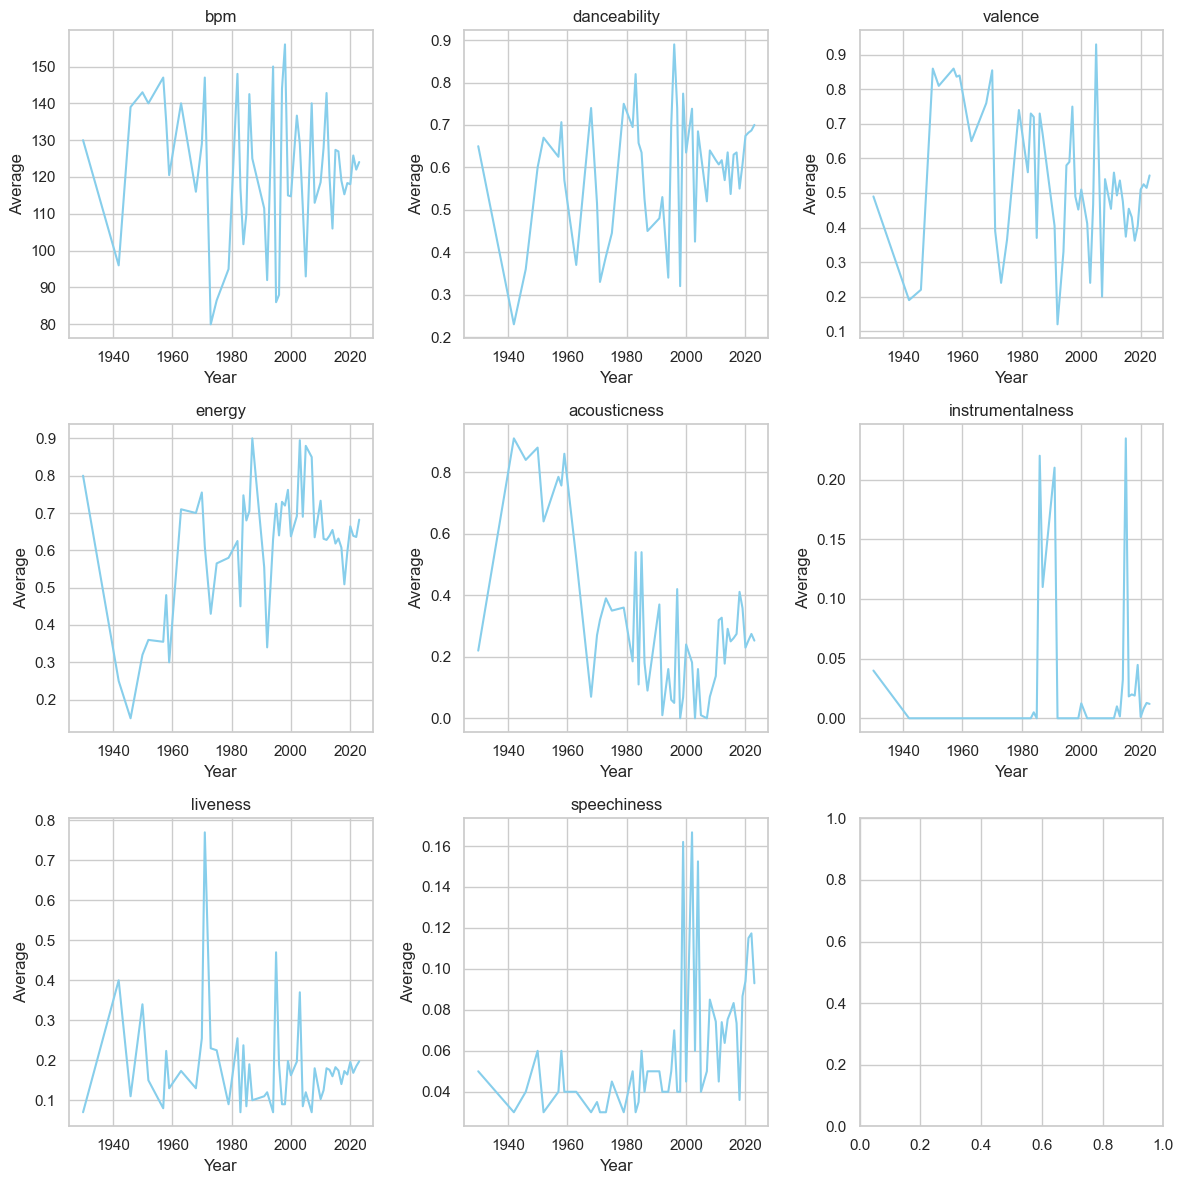

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

# Iterate over each feature and plot it on a separate subplot
for i, col in enumerate(['bpm', 'danceability','valence', 'energy', 'acousticness', 'instrumentalness', 'liveness','speechiness']):
    ax = axes[i]  # Get the current axis
    ax.plot(audio_features_by_year.index, audio_features_by_year[col], color='skyblue')  # Plot the line plot for the current feature
    ax.set_title(col)  # Set the title for the subplot
    ax.set_xlabel('Year')  # Set the label for the x-axis
    ax.set_ylabel('Average')  # Set the label for the y-axis

# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

Even though the danceability has increased over time valence has decreased. Valence is measure of how positive or negative a song is. So can we say we’re dancing a lot to sad songs?
There’s a converse correlation between energy and acousticness of songs over time. This makes sense since songs in are now produced electronically as opposed to the use of acoustic sounds.
Speech in songs increased over time.